In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('bigdatamart_Train.csv')
test=pd.read_csv('bigdatamart_Test.csv')

In [3]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [5]:
test.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [6]:
# Checking the shape of the training and testing datasets

print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [7]:
# combining the train and test dataset

data = pd.concat([train, test])

print(data.shape)

(14204, 12)


Data Visualization

univariate data analysis

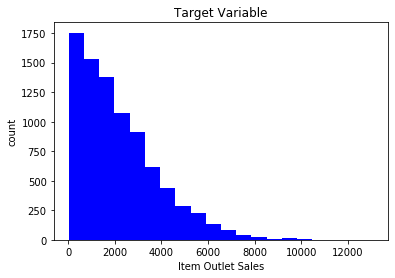

In [8]:
plt.hist(train['Item_Outlet_Sales'],bins = 20, color = 'blue')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

In [9]:
# checking the columns of the train set

print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [10]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
# checking the different items in Item Idemtifier

train['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCJ30     9
FDX04     9
FDT07     9
         ..
FDN52     1
FDO33     1
FDQ60     1
FDT35     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

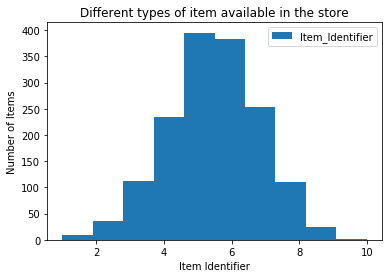

In [12]:
# we will analyze only the training set

train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [13]:
# checking the different items in Item Fat Content

train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

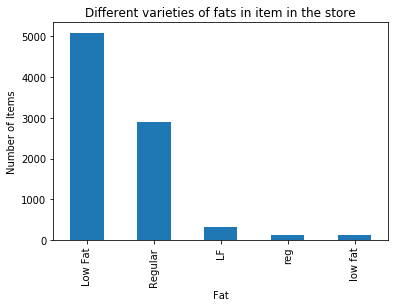

In [14]:
# checking different varieties of item fat content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [15]:
# checking the different items in Item Type

train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

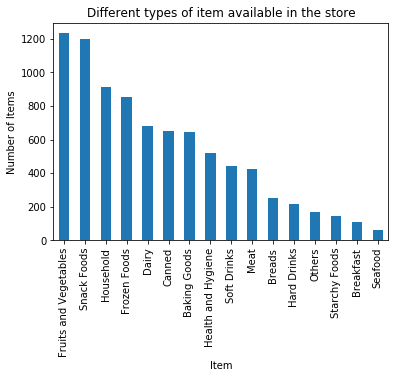

In [16]:
# we will analyze only the training set

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [17]:
# checking the different types of Outlet Identifier

train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

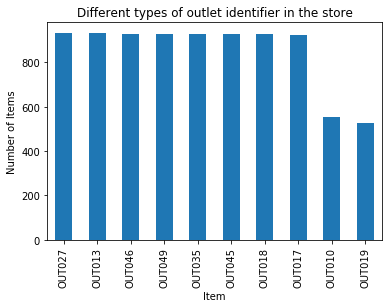

In [18]:
# we will analyze only the training set

train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [19]:
# checking the different types of Outlet Size

train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

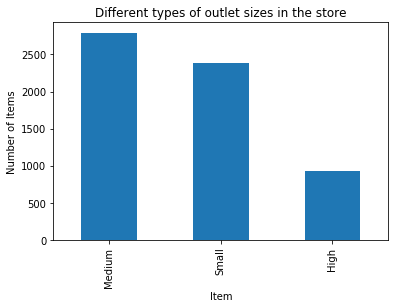

In [20]:
# we will analyze only the training set

train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [21]:
# checking different types of items in Outlet Location Type

train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

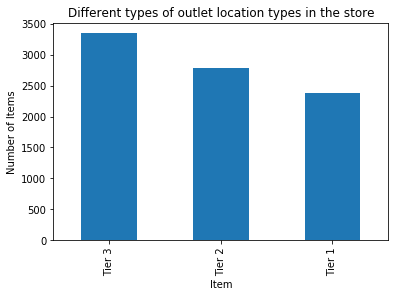

In [22]:
# we will analyze only the training set

train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [23]:
# checking different types of item in Outlet Type

train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

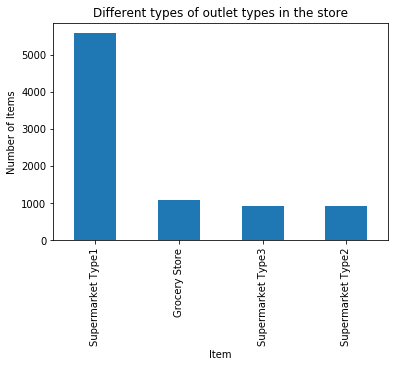

In [24]:
# we will analyze only the training set

train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

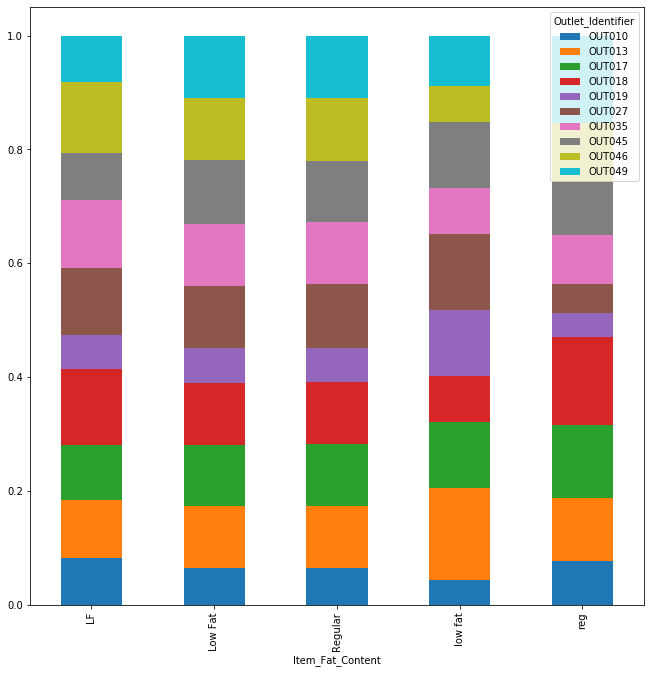

In [25]:
# fat content vs outlet identifier

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))

data pre processing

In [26]:
# checking unique values in the columns of train dataset

data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [27]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [28]:
# imputing missing values

data['Item_Weight'] = data['Item_Weight'].replace(0, np.NaN)
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].replace(0, np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mode()[0], inplace = True)

data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
# combining reg, Regular and Low Fat, low fat and, LF


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [30]:
# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [31]:
# determining the operation peroid of a time

data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

In [32]:
data['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [33]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               Food         9.30          Low Fat         0.016047   
1             Drinks         5.92          Regular         0.019278   
2               Food        17.50          Low Fat         0.016760   
3               Food        19.20          Regular         0.000000   
4     Non_Consumable         8.93          Low Fat         0.000000   
...              ...          ...              ...              ...   
5676            Food        10.50          Regular         0.013496   
5677            Food         7.60          Regular         0.142991   
5678  Non_Consumable        10.00          Low Fat         0.073529   
5679            Food        15.30          Regular         0.000000   
5680            Food         9.50          Regular         0.104720   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
5676            Snack Foods  141.3154            OUT046   
5677          Starchy Foods  169.1448            OUT018   
5678     Health and Hygiene  118.7440            OUT045   
5679                 Canned  214.6218            OUT017   
5680                 Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002      Medium               Tier 2   
5679                       2007      Medium               Tier 2   
5680                       2002      Medium               Tier 2   

            Outlet_Type  Item_Outlet_Sales  Outlet_Years  
0     Supermarket Type1          3735.1380            14  
1     Supermarket Type2           443.4228             4  
2     Supermarket Type1          2097.2700            14  
3         Grocery Store           732.3800            15  
4     Supermarket Type1           994.7052            26  
...                 ...                ...           ...  
5676  Supermarket Type1           958.7520            16  
5677  Supermarket Type2           958.7520             4  
5678  Supermarket Type1           958.7520            11  
5679  Supermarket Type1           958.7520             6  
5680  Supermarket Type1           958.7520            11  

[14204 rows x 13 columns]

In [34]:
# label encoding

from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                   1          284                 0             1097   
1                   0           57                 1             1436   
2                   1          376                 0             1172   
3                   1          393                 1                0   
4                   2          265                 0                0   
...               ...          ...               ...              ...   
5676                1          298                 1              718   
5677                1          180                 1            11820   
5678                2          293                 0             8009   
5679                1          354                 1                0   
5680                1          288                 1            10187   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4      7567                  9                          4   
1            14       632                  3                          8   
2            10      3897                  9                          4   
3             6      5626                  0                          3   
4             9       848                  1                          1   
...         ...       ...                ...                        ...   
5676         13      3881                  8                          2   
5677         15      5069                  3                          8   
5678          8      3196                  7                          5   
5679          3      6626                  2                          7   
5680          3      1523                  7                          5   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0               1                     0            1               2540   
1               1                     2            2                422   
2               1                     0            1               1639   
3               1                     2            0                670   
4               0                     2            1                865   
...           ...                   ...          ...                ...   
5676            2                     0            1                835   
5677            1                     2            2                835   
5678            1                     1            1                835   
5679            1                     1            1                835   
5680            1                     1            1                835   

      Outlet_Years  
0                4  
1                0  
2                4  
3                5  
4                7  
...            ...  
5676             6  
5677             0  
5678             3  
5679             1  
5680             3  

[14204 rows x 13 columns]

In [35]:
# one hot encoding

data = pd.get_dummies(data)

print(data.shape)
data

(14204, 47)


Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0            9.30         0.016047  249.8092                       1999   
1            5.92         0.019278   48.2692                       2009   
2           17.50         0.016760  141.6180                       1999   
3           19.20         0.000000  182.0950                       1998   
4            8.93         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
5676        10.50         0.013496  141.3154                       1997   
5677         7.60         0.142991  169.1448                       2009   
5678        10.00         0.073529  118.7440                       2002   
5679        15.30         0.000000  214.6218                       2007   
5680         9.50         0.104720   79.7960                       2002   

      Item_Outlet_Sales  Outlet_Years  Item_Identifier_Drinks  \
0             3735.1380            14                       0   
1              443.4228             4                       1   
2             2097.2700            14                       0   
3              732.3800            15                       0   
4              994.7052            26                       0   
...                 ...           ...                     ...   
5676           958.7520            16                       0   
5677           958.7520             4                       0   
5678           958.7520            11                       0   
5679           958.7520             6                       0   
5680           958.7520            11                       0   

      Item_Identifier_Food  Item_Identifier_Non_Consumable  \
0                        1                               0   
1                        0                               0   
2                        1                               0   
3                        1                               0   
4                        0                               1   
...                    ...                             ...   
5676                     1                               0   
5677                     1                               0   
5678                     0                               1   
5679                     1                               0   
5680                     1                               0   

      Item_Fat_Content_Low Fat  ...  Outlet_Size_High  Outlet_Size_Medium  \
0                            1  ...                 0                   1   
1                            0  ...                 0                   1   
2                            1  ...                 0                   1   
3                            0  ...                 0                   1   
4                            1  ...                 1                   0   
...                        ...  ...               ...                 ...   
5676                         0  ...                 0                   0   
5677                         0  ...                 0                   1   
5678                         1  ...                 0                   1   
5679                         0  ...                 0                   1   
5680                         0  ...                 0                   1   

      Outlet_Size_Small  Outlet_Location_Type_Tier 1  \
0                     0                            1   
1                     0                            0   
2                     0                            1   
3                     0                            0   
4                     0                            0   
...                 ...                          ...   
5676                  1                            1   
5677                  0                            0   
5678                  0                            0   
5679                  0                            0   
5680                  0               

In [36]:
# splitting the data into dependent and independent variables

x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 46)
(14204,)


In [37]:
# splitting the dataset into train and test

train = data.iloc[:8523,:]
test = data.iloc[8523:,:]

print(train.shape)
print(test.shape)

(8523, 47)
(5681, 47)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model 
max_r_score=0;
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
   # print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)



max r2 score corresponding to random state: 66 is 0.3052178553778142


In [39]:
#lets use cross val score function to check above is overfitting or not
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2')
a_score

array([ 2.89087291e-01,  2.93158219e-01,  2.97862809e-01, -1.58533019e+31,
       -3.39863762e+31])

In [40]:
#lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [41]:
#lets find the rmse and r2_score using sklearn.metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:  ",np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score is : ',r2_score(y_test,y_pred))

RMSE is:   1217.562887214095
r2_score is :  0.31812475361140846


In [43]:
from sklearn.externals import joblib
joblib.dump(lr,'bigdata_model.csv')

['bigdata_model.csv']

In [44]:
model=joblib.load('bigdata_model.csv')

In [45]:
model.predict(x_test)

array([1052., 1908., 1924., ...,  936., 1396., 2716.])